<a href="https://colab.research.google.com/github/Taazkir/ML-predicting-house-prices-philadelphia/blob/main/Predicting_House_Prices_in_Philadelphia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# https://medium.com/@GaussEuler/philadelphia-housing-data-part-i-data-analysis-fe45415554a9


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('Phila_housing_data.csv', low_memory=False)


In [6]:
print(df.shape)
print(df.columns)

(582942, 82)
Index(['the_geom', 'the_geom_webmercator', 'assessment_date', 'basements',
       'beginning_point', 'book_and_page', 'building_code',
       'building_code_description', 'category_code',
       'category_code_description', 'census_tract', 'central_air',
       'cross_reference', 'date_exterior_condition', 'depth',
       'exempt_building', 'exempt_land', 'exterior_condition', 'fireplaces',
       'frontage', 'fuel', 'garage_spaces', 'garage_type',
       'general_construction', 'geographic_ward', 'homestead_exemption',
       'house_extension', 'house_number', 'interior_condition', 'location',
       'mailing_address_1', 'mailing_address_2', 'mailing_care_of',
       'mailing_city_state', 'mailing_street', 'mailing_zip', 'market_value',
       'market_value_date', 'number_of_bathrooms', 'number_of_bedrooms',
       'number_of_rooms', 'number_stories', 'off_street_open',
       'other_building', 'owner_1', 'owner_2', 'parcel_number', 'parcel_shape',
       'quality_grade',

In [7]:
# Drop columns that are not valuable
drop_column_list = ['the_geom', 'assessment_date','beginning_point', 'book_and_page',
                    'category_code_description', 'cross_reference', 'house_number',
                    'location', 'mailing_address_1', 'mailing_address_2', 'mailing_care_of',
                    'mailing_city_state', 'mailing_street', 'market_value_date',
                    'the_geom_webmercator','other_building','owner_1', 'owner_2',
                    'parcel_number', 'recording_date', 'sale_date', 'registry_number',
                    'sale_price', 'unit', 'objectid','building_code', 'census_tract',
                    'date_exterior_condition', 'year_built_estimate', 'house_extension',
                    'mailing_zip', 'sewer', 'site_type','state_code', 'street_designation',
                    'street_name', 'street_direction', 'geographic_ward', 'pin',
                    'unfinished', 'utility', 'suffix', 'quality_grade',
                    'separate_utilities', 'building_code_description', 'building_code_new',
                    'building_code_description_new', 'garage_type','interior_condition',
                    'number_stories', 'number_of_rooms', 'zoning']

data = df.drop(drop_column_list, axis = 1)

# Drop market values that are zero or missing
data = data.dropna(subset=["market_value"])
data = data.drop(data[data.market_value == 0].index)
data.shape


(582717, 30)

In [8]:
# Drop proprties that are not strictly residential houses

# Deleting 'Mixed Use'
data=data.drop(data[data.category_code == 3].index)
# Deleting ‘Commercial’
data=data.drop(data[data.category_code == 4].index)
# Deleting ‘Industrial
data=data.drop(data[data.category_code == 5].index)
# Deleting ‘Vacant Land’
data=data.drop(data[data.category_code == 6].index)
# Deleting 'Garage Commarcial'
data=data.drop(data[data.category_code == 7].index)
# Deleting 'Garage Residential'
data=data.drop(data[data.category_code == 8].index)
# Deleting 'Hotel'
data=data.drop(data[data.category_code == 9].index)
# Deleting 'Office'
data=data.drop(data[data.category_code == 10].index)
# Deleting 'Special Purpose'
data=data.drop(data[data.category_code == 11].index)
# Deleting 'Vacant land non resdidential'
data=data.drop(data[data.category_code == 12].index)
# Deleting 'Vacant land resdidential'
data=data.drop(data[data.category_code == 13].index)
# Deleting 'Apartment > 4 units'
data=data.drop(data[data.category_code == 14].index)
# Deleting 'Retail'
data=data.drop(data[data.category_code == 15].index)
# Deleting 'Blank descriptions'
data=data.drop(data[data.category_code == 16].index)

data.columns
data.shape


(503878, 30)

In [9]:
# Handling 'basements'
print(data.basements.value_counts(dropna=False))

# Basement Codes

# D = Full – Unknown Finish
# F = Partial - Semi-Finished
# H = Partial - Unknown Finish
# C = Full - Unfinished
# A = Full - Finished
# J = Unknown Size - Unfinished
# 0 = No Basement
# E = Partial - Finished
# I = Unknown Size - Finished
# G = Partial - Unfinished
# B = Full - Semi-Finished

# Replacing missing basement with "L" and zero (no basement) with "K"

data.loc[:, "basements"] = data.loc[:, "basements"].fillna('L')
data.loc[:, "basements"] = data['basements'].replace('0', 'K')
data.shape


NaN    173666
D      107755
F       64127
H       57371
C       34003
A       28156
0       10780
E       10104
J        7566
G        4366
B        3146
I        2054
1         659
4          97
2          20
3           8
Name: basements, dtype: int64


(503878, 30)

In [10]:
# Handling 'central_air'
print(data.central_air.value_counts(dropna=False))

# Replacing '0' with 'N'
data.loc[:, "central_air"] = data['central_air'].replace('0', 'N')
# Replacing "NaN" with 'N'
data.loc[:, "central_air"] = data['central_air'].fillna('N')
# Replacing '1' with 'Y'
data.loc[:, "central_air"] = data['central_air'].replace('1', 'Y')

data.shape


NaN    210323
N      164261
Y      128065
0        1083
1         146
Name: central_air, dtype: int64


(503878, 30)

4      395019
3       48720
5       24420
1       16468
2       12670
7        3535
6        2686
NaN       297
0          62
A           1
Name: exterior_condition, dtype: int64


(503581, 30)

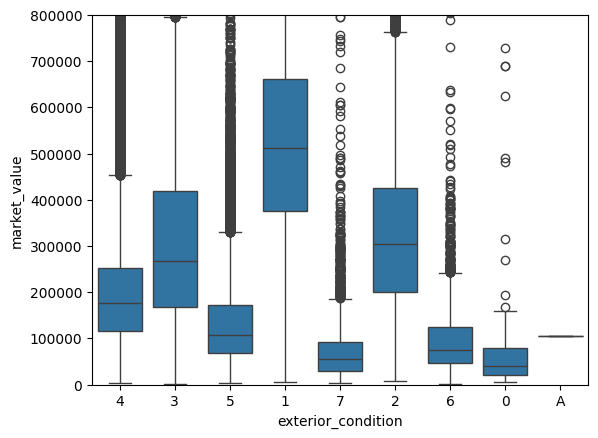

In [11]:
# Handling 'exterior_condition'
print(data.exterior_condition.value_counts(dropna=False))

# Box plot: 'market_value' vs. 'exterior_condition'
condition_df = pd.concat([data['market_value'],
                         data['exterior_condition']], axis=1)

box_fig = sns.boxplot(x='exterior_condition', y="market_value", data=condition_df)
box_fig.axis(ymin=0, ymax=800000)

# Exterior Condition key
'''
0.0 - Not Applicable
1.0 - Best Condition
.
.
.
7.0 - Worst Condition
'''

# Dropping NaN

data = data.dropna(subset=["exterior_condition"])

data.shape


NaN    454167
A       46616
C        2235
B         474
G          55
E          16
H          11
I           6
D           1
Name: fuel, dtype: int64


(503574, 30)

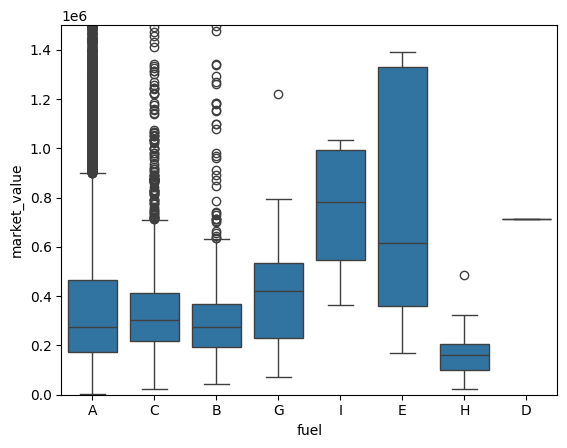

In [12]:
# Handling 'fuel'
print(data.fuel.value_counts(dropna=False))

# Box plot market value vs fuel

fuel_df = pd.concat([data['market_value'],
                         data['fuel']], axis=1)

box_fig = sns.boxplot(x='fuel', y="market_value", data=fuel_df)
box_fig.axis(ymin=0, ymax=1500000)

# Fuel Key
'''
A = Natural Gas
C = Electric
B = Oil heat
E = Solar
G = Other
H = None
I = Unknown
'''
# Replace NaN with G (other) and drop I and D
data.loc[:, "fuel"] = data['fuel'].fillna("G")
data = data.drop(data[data.fuel == "I"].index)
data = data.drop(data[data.fuel == "D"].index)

data.shape


In [13]:
# Handling longitude and latitude

# FIlling missing longitude and latitude with the mean
data["lng"] = data.lng.fillna(data.lng.mean())
data["lat"] = data.lat.fillna(data.lat.mean())

# Make longitude values positive
data.loc[:, "lng"] = data['lng'].abs()
data.shape


(503574, 30)

In [14]:
# Handling garage_spaces

print(data.garage_spaces.value_counts(dropna=False))
data.loc[:, "garage_spaces"] = data['garage_spaces'].fillna(0.0)
data.shape


0.0     321367
1.0     158088
2.0      14806
NaN       8152
3.0        612
4.0        262
5.0         63
6.0         45
10.0        39
37.0        37
8.0         22
7.0         19
11.0         9
12.0         8
20.0         7
14.0         7
9.0          5
24.0         4
18.0         4
16.0         4
13.0         3
15.0         3
22.0         2
72.0         1
28.0         1
23.0         1
19.0         1
36.0         1
25.0         1
Name: garage_spaces, dtype: int64


(503574, 30)

In [15]:
# Handling 'general_construction'

print(data.general_construction.value_counts(dropna=False))

'''
A = Common brick
B = Brick and Siding
E = Stone
C = Frame and siding
F = Stucco/Cement
G = Other/Mix
H = Brick and stucco
J = Stone/stucco
I = Stucco and siding
D = Frame and shingle
'''
# Dropping NaN values
data = data.dropna(subset=["general_construction"])

data.shape

A      414151
B       32747
NaN     15327
C       11005
E       10938
F        6983
H        4741
G        2599
J        1710
3        1171
I        1142
1         287
D         248
4         174
5         132
6         113
9         105
8           1
Name: general_construction, dtype: int64


(488247, 30)

In [16]:
# Handle 'parcel_shape'

#data.parcel_shape.value_counts(dropna=False)

'''
 E = Rectangular
A = Other than a square, rectangular or triangle
B = Curves, narrow portions, long access driveways
C = Triangular
F = NaN
D = Long and narrow
'''
# Replacing NaNs with F
data.loc[:, "parcel_shape"] = data['parcel_shape'].fillna('F')
data.shape

<ipython-input-16-dd8297d6aa65>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, "parcel_shape"] = data['parcel_shape'].fillna('F')


(488247, 30)

In [17]:
# Handling 'topography'

print(data.topography.value_counts(dropna=False))

# Topography key
'''
F = Street level
A = Above Street Level
E = Other and NaN’s
B = Below Street Level
C = Flood Plain
D = Rocky
'''

# Replacing NaNs with E
data.loc[:, "topography"] = data['topography'].fillna('E')

print(data.topography.value_counts(dropna=False))

data.shape

F      433305
A       27854
NaN     22251
E        4366
B         232
C         139
D         100
Name: topography, dtype: int64
F    433305
A     27854
E     26617
B       232
C       139
D       100
Name: topography, dtype: int64


<ipython-input-17-36e346094f36>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, "topography"] = data['topography'].fillna('E')


(488247, 30)

In [18]:
# Handling 'type_heater'

# Type Heater key

'''
H = Undetermined
A = Hot air (ducts)
B = Hot water (radiators or baseboards)
G = Radiant
N = None
C = Electric baseboard
E = Other
D = Outside heat pump
'''

data.loc[:, "type_heater"] = data['type_heater'].fillna('N')

data.shape

(488247, 30)

I      454095
A       13982
C        7335
0        2883
H        2639
D        2495
NaN      1979
E        1893
B         946
Name: view_type, dtype: int64


(486268, 30)

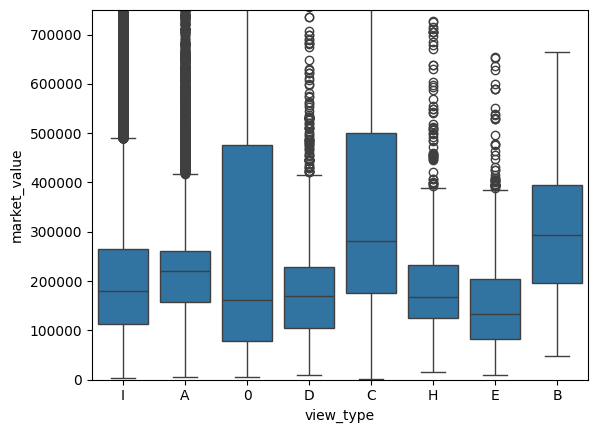

In [19]:
# Handling 'view_type'
print(data.view_type.value_counts(dropna=False))

# Type view_type

'''
I = Typical/Other
A = Cityscape / Skyline
C = Park / Green Area
D = Commercial
N = Not Applicable
H = Industrial
E = Edifice / Landmark
B = Flowing Water
0 = Unknown

Ranking of view types:
0, C, A, B, I, D, H E
'''
view_df = pd.concat([data['market_value'],
                         data['view_type']], axis=1)

box_fig = sns.boxplot(x='view_type', y="market_value", data=view_df)
box_fig.axis(ymin=0, ymax=750000)

# Drop NaN
data = data.dropna(subset=["view_type"])
data.shape


In [20]:
# Handling ‘number_of_rooms’, ‘number_of_bedrooms’, ‘number_of_bathrooms’

print(data.number_of_bathrooms.value_counts(dropna=False))
print(data.number_of_bedrooms.value_counts(dropna=False))

data = data.dropna(subset=['number_of_bedrooms', 'number_of_bathrooms'])

data.shape

1.0     313433
0.0     104676
2.0      48411
3.0      11113
NaN       5391
4.0       2320
5.0        423
6.0        280
8.0         79
7.0         76
9.0         18
10.0        16
12.0        14
13.0         4
11.0         4
21.0         2
15.0         2
14.0         2
22.0         1
17.0         1
16.0         1
25.0         1
Name: number_of_bathrooms, dtype: int64
3.0     284683
0.0     104092
4.0      49380
2.0      32634
5.0       5810
6.0       3191
NaN       2655
1.0       2231
7.0        676
8.0        497
9.0        208
12.0        63
10.0        59
11.0        34
13.0        13
14.0        10
31.0        10
30.0         5
15.0         5
16.0         3
44.0         3
18.0         2
20.0         2
40.0         1
45.0         1
Name: number_of_bedrooms, dtype: int64


(480858, 30)

In [21]:
# Handling fireplaces

print(data.fireplaces.value_counts(dropna=False))
data = data.dropna(subset=['fireplaces'])

0.0     464848
1.0      11690
2.0       1648
NaN       1578
3.0        651
5.0        275
4.0        167
10.0         1
Name: fireplaces, dtype: int64


In [22]:
# Drop missing and 0 depth
data = data.dropna(subset=["depth"])
data = data.drop(data[data.depth == 0].index)

In [23]:
# Handling off_street_open

print(data.off_street_open.value_counts(dropna=False))
data = data.dropna(subset=['off_street_open'])

NaN       1520
1341.0     504
967.0      467
937.0      442
796.0      431
          ... 
576.0        1
4540.0       1
6626.0       1
2565.0       1
3819.0       1
Name: off_street_open, Length: 5256, dtype: int64


In [24]:
# Handling taxable_building

print(data.taxable_building.value_counts(dropna=False))
data = data.dropna(subset=['taxable_building'])

0.00         47116
17700.00       817
137200.00      388
64000.00       353
58400.00       339
             ...  
85272.00         1
53734.00         1
228883.00        1
196978.32        1
64250.00         1
Name: taxable_building, Length: 22006, dtype: int64


In [65]:
# Check that data has no missing values
check_NaN = data.isna().sum()
print(check_NaN)
data


basements               0
category_code           0
central_air             0
depth                   0
exempt_building         0
exempt_land             0
exterior_condition      0
fireplaces              0
frontage                0
fuel                    0
garage_spaces           0
general_construction    0
homestead_exemption     0
market_value            0
number_of_bathrooms     0
number_of_bedrooms      0
off_street_open         0
parcel_shape            0
street_code             0
taxable_building        0
taxable_land            0
topography              0
total_area              0
total_livable_area      0
type_heater             0
view_type               0
year_built              0
zip_code                0
lat                     0
lng                     0
dtype: int64


,basements,category_code,central_air,depth,exempt_building,exempt_land,exterior_condition,fireplaces,frontage,fuel,...,taxable_land,topography,total_area,total_livable_area,type_heater,view_type,year_built,zip_code,lat,lng
11,D,1,N,64.0,0.0,0.0,4,0.0,14.0,G,...,2600.0,F,776.0,258.0,H,I,1899.0,19125.0,39.977132,75.127125
18,L,2,N,100.0,329760.0,82440.0,4,0.0,16.0,G,...,0.0,F,1600.0,2540.0,N,I,1890.0,19121.0,39.979887,75.160682
24,D,2,N,78.0,311700.0,0.0,3,0.0,16.0,G,...,116100.0,F,1244.0,1280.0,H,I,1935.0,19130.0,39.971723,75.181206
27,L,1,N,44.0,32000.0,8000.0,4,0.0,14.0,G,...,0.0,F,609.0,840.0,N,I,1915.0,19132.0,39.991279,75.174171
115,D,1,N,57.0,17700.0,5900.0,4,0.0,15.0,G,...,0.0,F,869.0,1619.0,H,A,1920.0,19130.0,39.966744,75.167490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582922,L,1,N,57.0,21520.0,5380.0,3,0.0,15.0,G,...,0.0,F,860.0,1036.0,N,I,1920.0,19139.0,39.962816,75.228366
582923,L,1,N,78.0,0.0,0.0,4,0.0,15.0,G,...,9680.0,F,1170.0,1165.0,N,I,1925.0,19131.0,39.970289,75.230985
582924,L,1,N,43.0,80000.0,0.0,4,0.0,16.0,G,...,53020.0,A,688.0,960.0,H,I,1920.0,19147.0,39.933456,75.154881
582925,D,1,N,53.0,0.0,0.0,4,0.0,14.0,G,...,39880.0,F,742.0,1096.0,H,I,1923.0,19145.0,39.928696,75.172830


In [26]:
print(data.basements.value_counts(dropna=False))
print(data.category_code.value_counts(dropna=False))
print(data.central_air.value_counts(dropna=False))
print(data.depth.value_counts(dropna=False))
print(data.exempt_building.value_counts(dropna=False))
print(data.exempt_land.value_counts(dropna=False))
print(data.exterior_condition.value_counts(dropna=False))
print(data.fireplaces.value_counts(dropna=False))
print(data.frontage.value_counts(dropna=False))
print(data.fuel.value_counts(dropna=False))
print(data.garage_spaces.value_counts(dropna=False))
print(data.general_construction.value_counts(dropna=False))
print(data.homestead_exemption.value_counts(dropna=False))
print(data.number_of_bathrooms.value_counts(dropna=False))
print(data.number_of_bedrooms.value_counts(dropna=False))
print(data.off_street_open.value_counts(dropna=False))
print(data.parcel_shape.value_counts(dropna=False))
print(data.street_code.value_counts(dropna=False))
print(data.taxable_building.value_counts(dropna=False))
print(data.taxable_land.value_counts(dropna=False))
print(data.topography.value_counts(dropna=False))
print(data.total_area.value_counts(dropna=False))
print(data.total_livable_area.value_counts(dropna=False))
print(data.type_heater.value_counts(dropna=False))
print(data.view_type.value_counts(dropna=False))
print(data.year_built.value_counts(dropna=False))
print(data.zip_code.value_counts(dropna=False))
print(data.lat.value_counts(dropna=False))
print(data.lng.value_counts(dropna=False))



L    135650
D    107018
F     63923
H     57254
C     33447
A     24067
E      9513
J      7514
K      7221
G      4284
B      3045
I      2022
1       202
4        39
2        12
3         1
Name: basements, dtype: int64
1    418986
2     36226
Name: category_code, dtype: int64
N    357870
Y     97342
Name: central_air, dtype: int64
100.0    31617
90.0     19354
70.0     15017
60.0     14371
50.0     13731
         ...  
678.0        1
481.0        1
504.0        1
650.0        1
488.0        1
Name: depth, Length: 555, dtype: int64
0.0          205427
80000.0      185172
64400.0         178
53200.0         178
58400.0         172
              ...  
378315.0          1
1397300.0         1
452240.0          1
79885.0           1
32596.0           1
Name: exempt_building, Length: 13473, dtype: int64
0.0         412842
15600.0        395
14800.0        392
15200.0        321
14600.0        308
             ...  
7354.0           1
135760.0         1
56820.0          1
15830.0          1

## **Feature Engineering:**


**Binary:**
Basement,
General Construction,
Fuel,
Parcel Shape,
Type Heater,
View type,
Exterior Condition,
Taxable land,
Zip code,
Topography


**One Hot:**
Central Air


**Numeric:**
Category_code,
Depth,
Exempt_building,
Exempt_land,
Fireplaces,
Frontage,
Garage spaces,
Homestead exepmtion,
Num bedrooms,
Num bathrooms,
Off street open,
Street code,
Taxable building,
Total area,
Total liveable area,
Year build,
Lat,
Lng


In [27]:
!pip install category_encoders
import category_encoders as ce

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.0 MB/s eta 0:00:00


In [28]:
# Binary Encode Caterogic values

binary_encoding = ce.BinaryEncoder(cols=['basements', 'general_construction',
                                         'fuel', 'parcel_shape', 'type_heater',
                                         'view_type', 'exterior_condition',
                                         'taxable_land', 'zip_code', 'topography'])
data_fit = binary_encoding.fit_transform(data)
data_fit


,basements_0,basements_1,basements_2,basements_3,basements_4,category_code,central_air,depth,exempt_building,exempt_land,...,view_type_3,year_built,zip_code_0,zip_code_1,zip_code_2,zip_code_3,zip_code_4,zip_code_5,lat,lng
11,0,0,0,0,1,1,N,64.0,0.0,0.0,...,1,1899.0,0,0,0,0,0,1,39.977132,75.127125
18,0,0,0,1,0,2,N,100.0,329760.0,82440.0,...,1,1890.0,0,0,0,0,1,0,39.979887,75.160682
24,0,0,0,0,1,2,N,78.0,311700.0,0.0,...,1,1935.0,0,0,0,0,1,1,39.971723,75.181206
27,0,0,0,1,0,1,N,44.0,32000.0,8000.0,...,1,1915.0,0,0,0,1,0,0,39.991279,75.174171
115,0,0,0,0,1,1,N,57.0,17700.0,5900.0,...,0,1920.0,0,0,0,0,1,1,39.966744,75.167490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582922,0,0,0,1,0,1,N,57.0,21520.0,5380.0,...,1,1920.0,0,1,1,0,1,0,39.962816,75.228366
582923,0,0,0,1,0,1,N,78.0,0.0,0.0,...,1,1925.0,0,0,0,1,1,0,39.970289,75.230985
582924,0,0,0,1,0,1,N,43.0,80000.0,0.0,...,1,1920.0,0,1,0,1,0,0,39.933456,75.154881
582925,0,0,0,0,1,1,N,53.0,0.0,0.0,...,1,1923.0,0,1,0,0,0,0,39.928696,75.172830


In [29]:
# One Hot Encoding central_air

ohe_encoding = ce.OneHotEncoder(cols=['central_air'])
data1_fit = ohe_encoding.fit_transform(data_fit)
data1_fit


,basements_0,basements_1,basements_2,basements_3,basements_4,category_code,central_air_1,central_air_2,depth,exempt_building,...,view_type_3,year_built,zip_code_0,zip_code_1,zip_code_2,zip_code_3,zip_code_4,zip_code_5,lat,lng
11,0,0,0,0,1,1,1,0,64.0,0.0,...,1,1899.0,0,0,0,0,0,1,39.977132,75.127125
18,0,0,0,1,0,2,1,0,100.0,329760.0,...,1,1890.0,0,0,0,0,1,0,39.979887,75.160682
24,0,0,0,0,1,2,1,0,78.0,311700.0,...,1,1935.0,0,0,0,0,1,1,39.971723,75.181206
27,0,0,0,1,0,1,1,0,44.0,32000.0,...,1,1915.0,0,0,0,1,0,0,39.991279,75.174171
115,0,0,0,0,1,1,1,0,57.0,17700.0,...,0,1920.0,0,0,0,0,1,1,39.966744,75.167490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582922,0,0,0,1,0,1,1,0,57.0,21520.0,...,1,1920.0,0,1,1,0,1,0,39.962816,75.228366
582923,0,0,0,1,0,1,1,0,78.0,0.0,...,1,1925.0,0,0,0,1,1,0,39.970289,75.230985
582924,0,0,0,1,0,1,1,0,43.0,80000.0,...,1,1920.0,0,1,0,1,0,0,39.933456,75.154881
582925,0,0,0,0,1,1,1,0,53.0,0.0,...,1,1923.0,0,1,0,0,0,0,39.928696,75.172830


In [34]:
newest_data = data1_fit


In [53]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Define the numeric features
numeric_features = ['category_code', 'depth', 'exempt_building', 'exempt_land',
                    'fireplaces', 'frontage', 'garage_spaces', 'homestead_exemption',
                    'number_of_bathrooms', 'number_of_bedrooms', 'off_street_open',
                    'street_code', 'taxable_building', 'total_area', 'total_livable_area',
                    'year_built', 'lat', 'lng']

# Standardize the numeric features
scaler = StandardScaler()
data1_fit[numeric_features] = scaler.fit_transform(data1_fit[numeric_features])

# Calculate the IQR for each feature
Q1 = data1_fit[numeric_features].quantile(0.25)
Q3 = data1_fit[numeric_features].quantile(0.75)
IQR = Q3 - Q1

# Define the threshold multiplier
threshold = 1.5

# Identify outliers
outliers = ((data1_fit[numeric_features] < (Q1 - threshold * IQR)) |
            (data1_fit[numeric_features] > (Q3 + threshold * IQR))).any(axis=1)

# Filter the DataFrame to remove outliers
df_filtered = data1_fit[~outliers]

# Display the shape of the filtered DataFrame to see how many outliers were removed
print("Shape of original DataFrame:", data1_fit.shape)
print("Shape of filtered DataFrame after removing outliers:", df_filtered.shape)



Shape of original DataFrame: (455212, 72)
Shape of filtered DataFrame after removing outliers: (226572, 72)


In [54]:
# DataFrame with all numerics and outliers removed
df_filtered

,basements_0,basements_1,basements_2,basements_3,basements_4,category_code,central_air_1,central_air_2,depth,exempt_building,...,view_type_3,year_built,zip_code_0,zip_code_1,zip_code_2,zip_code_3,zip_code_4,zip_code_5,lat,lng
617,0,0,1,0,0,-0.294043,1,0,-0.855173,-0.658344,...,1,-0.431790,0,1,0,0,0,0,-1.506534,0.463817
954,0,0,1,0,1,-0.294043,0,1,-0.940736,0.372704,...,1,-0.431790,0,1,0,1,0,0,-1.332672,0.353784
956,0,0,1,1,0,-0.294043,1,0,-0.127887,-0.658344,...,1,-0.286955,0,1,0,0,1,0,-0.471326,1.609504
960,0,0,0,0,1,-0.294043,1,0,-0.299013,-0.658344,...,1,-0.286955,0,1,0,1,1,0,-1.571537,0.391227
963,0,0,0,1,0,-0.294043,1,0,-0.491530,-0.658344,...,1,-0.576624,0,0,0,0,1,0,-0.316012,0.602629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582917,0,0,0,1,0,-0.294043,1,0,-0.192060,-0.658344,...,1,-0.576624,0,0,0,0,1,0,-0.400853,0.506620
582923,0,0,0,1,0,-0.294043,1,0,-0.127887,-0.658344,...,1,-0.286955,0,0,0,1,1,0,-0.641958,1.304338
582924,0,0,0,1,0,-0.294043,1,0,-0.876564,0.372704,...,1,-0.431790,0,1,0,1,0,0,-1.351701,0.196429
582925,0,0,0,0,1,-0.294043,1,0,-0.662656,-0.658344,...,1,-0.344889,0,1,0,0,0,0,-1.443424,0.457733


In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'cleaned_data' is your cleaned DataFrame after removing outliers

# Splitting data into features and target variable
X = df_filtered.drop(columns=['market_value'])  # Assuming 'target_column' is your target variable
y = df_filtered['market_value']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# PCA with different numbers of components
n_components_list = [25, 35, 45, 55, 65]
for n_components in n_components_list:
    # Initialize PCA
    pca = PCA(n_components=n_components)

    # Fit and transform PCA on training data
    X_train_pca = pca.fit_transform(X_train)

    # Transform test data using the fitted PCA
    X_test_pca = pca.transform(X_test)

    print(f"Number of PCA components: {n_components}")

    # Train Linear Regression model
    lr_model = LinearRegression()
    lr_model.fit(X_train_pca, y_train)
    lr_pred = lr_model.predict(X_test_pca)
    lr_r2 = r2_score(y_test, lr_pred)
    lr_mse = mean_squared_error(y_test, lr_pred)
    lr_rmse = np.sqrt(lr_mse)
    print("Linear Regression - R^2:", lr_r2)
    print("Linear Regression - MSE:", lr_mse)
    print("Linear Regression - RMSE:", lr_rmse)

    # Train KBest model
    kbest_selector = SelectKBest(score_func=f_regression, k=n_components)
    X_train_kbest = kbest_selector.fit_transform(X_train, y_train)
    X_test_kbest = kbest_selector.transform(X_test)
    kbest_model = LinearRegression()
    kbest_model.fit(X_train_kbest, y_train)
    kbest_pred = kbest_model.predict(X_test_kbest)
    kbest_r2 = r2_score(y_test, kbest_pred)
    kbest_mse = mean_squared_error(y_test, kbest_pred)
    kbest_rmse = np.sqrt(kbest_mse)
    print("KBest - R^2:", kbest_r2)
    print("KBest - MSE:", kbest_mse)
    print("KBest - RMSE:", kbest_rmse)

    # Train Decision Trees model
    dt_model = DecisionTreeRegressor(random_state=42)
    dt_model.fit(X_train_pca, y_train)
    dt_pred = dt_model.predict(X_test_pca)
    dt_r2 = r2_score(y_test, dt_pred)
    dt_mse = mean_squared_error(y_test, dt_pred)
    dt_rmse = np.sqrt(dt_mse)
    print("Decision Trees - R^2:", dt_r2)
    print("Decision Trees - MSE:", dt_mse)
    print("Decision Trees - RMSE:", dt_rmse)

    print("--------------------------------------------------------")


Number of PCA components: 25
Linear Regression - R^2: 0.6726103799605254
Linear Regression - MSE: 1781536321.720025
Linear Regression - RMSE: 42208.24945102586


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:308: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)


KBest - R^2: 0.9999840960816764
KBest - MSE: 86543.39177829424
KBest - RMSE: 294.1825823842979
Decision Trees - R^2: 0.7481457949458346
Decision Trees - MSE: 1370499816.1756592
Decision Trees - RMSE: 37020.26223807254
--------------------------------------------------------
Number of PCA components: 35
Linear Regression - R^2: 0.7560719264785487
Linear Regression - MSE: 1327368664.9358675
Linear Regression - RMSE: 36433.071033552296


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:308: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)


KBest - R^2: 0.9999840649737406
KBest - MSE: 86712.66995360983
KBest - RMSE: 294.4701512099483
Decision Trees - R^2: 0.810417351656965
Decision Trees - MSE: 1031640447.0925742
Decision Trees - RMSE: 32119.160124333484
--------------------------------------------------------
Number of PCA components: 45
Linear Regression - R^2: 0.996056932121465
Linear Regression - MSE: 21456754.321565516
Linear Regression - RMSE: 4632.143598979366


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:308: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)


KBest - R^2: 0.9999840655861578
KBest - MSE: 86709.33739941289
KBest - RMSE: 294.4644925953092
Decision Trees - R^2: 0.8555469483021916
Decision Trees - MSE: 786061446.7615579
Decision Trees - RMSE: 28036.787383035844
--------------------------------------------------------
Number of PCA components: 55
Linear Regression - R^2: 0.9999840905707243
Linear Regression - MSE: 86573.38039293319
Linear Regression - RMSE: 294.2335473615019


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:308: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)


KBest - R^2: 0.9999840576681726
KBest - MSE: 86752.424221754
KBest - RMSE: 294.53764482957695
Decision Trees - R^2: 0.8907106519970177
Decision Trees - MSE: 594713244.1796315
Decision Trees - RMSE: 24386.74320567696
--------------------------------------------------------
Number of PCA components: 65
Linear Regression - R^2: 0.9999840678999423
Linear Regression - MSE: 86696.74661859876
Linear Regression - RMSE: 294.44311270362357


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:308: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)


KBest - R^2: 0.9999840680120647
KBest - MSE: 86696.13648867307
KBest - RMSE: 294.4420766274295
Decision Trees - R^2: 0.8898172349993518
Decision Trees - MSE: 599574897.4953105
Decision Trees - RMSE: 24486.218521758532
--------------------------------------------------------
